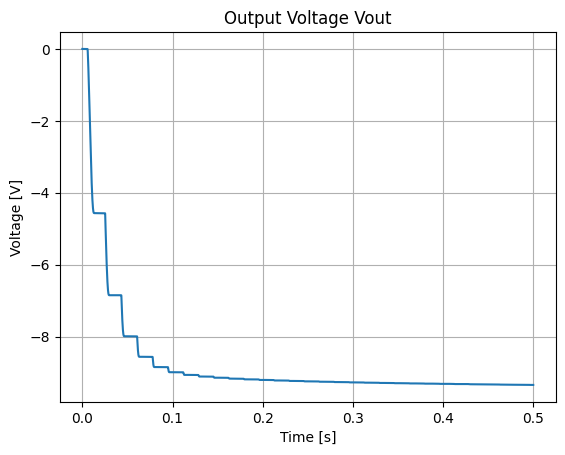

In [1]:
from PySpice.Spice.Netlist import Circuit
from PySpice.Probe.Plot import plot
from PySpice.Unit import *
import matplotlib.pyplot as plt

# Define the circuit
circuit = Circuit('Voltage Doubler with D1N4148 Diodes')

# Include the .mod file for the 1N4148 diode
circuit.include('1N4148.mod')

# Define the input sine wave with 5V amplitude and 60Hz frequency
circuit.SinusoidalVoltageSource(1, 'input', circuit.gnd, amplitude=5@u_V, frequency=60@u_Hz)

# Define capacitors
circuit.C(1, 'input', 'mid', 1@u_uF)
circuit.C(2, 'out', circuit.gnd, 1@u_uF)

# Use the diode model from the .mod file (D1N4148), using 'D()' instead of 'X()'
circuit.D(1, 'mid', circuit.gnd, model='D1N4148')  # D1
circuit.D(2, 'out', 'mid', model='D1N4148')  # D2

# Run the transient simulation
simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.transient(step_time=1@u_us, end_time=500@u_ms)

# Plot the output voltage V(out)
figure, ax = plt.subplots()
plot(analysis['out'], axis=ax)
plt.title('Output Voltage Vout')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.grid()
plt.show()